Import pandas for data processing and matplotlib for plotting cumulative reach

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

Importing from excel with preprocessing already completed. You want only your features/reasons and the unique user_ids.

In [231]:
covend = pd.read_excel("covend_turf.xlsx",index_col='uuid')
covend_check = pd.read_excel("covend_turf_check.xlsx", index_col='uuid')

covend = covend.drop(['record','date','reason2','reason14','reason15'],axis=1)
covend_check = covend_check.drop(['reason2'], axis=1)

In [223]:
def make_id_sets(dataframe):
    """
    Makes a list of sets of user IDs corresponding to individuals who selected that feature or reason. Need index to be user id,
    doesn't matter what the columns are named. List of sets will be the same order as that contained in DF columns.
    """
    sets = []
    for (column_name,data) in dataframe.iteritems():
        column_name = set(dataframe.index[data == 1])
        sets.append(column_name)
    return sets

def reach_order(starting_feature_index):
    """Intitates a list using index value of sets"""
    return [starting_feature_index]

def reach_percentage(sets,starting_feature_index,dataframe):
    """Initaties a list using index value and original DF"""
    return [((len(sets[starting_feature_index]))/(len(dataframe)))]

def calculate_order_percentages(sets,upper_range_loop,dataframe,starting_feature_index):
    """
    First calls functions to set the starting point for the TURF. Then will loop through the range specified (this is the 
    number of features to go through before you reach the limit you're looking for). Each outer loop has an inner loop that
    checks the difference between the full set of features currently held and the set in that iteration. Set with the most
    difference has its index value added and is joined with the full set. Reach percentage is also calculated. Returns 
    order and percentages as a list.
    """
    order = reach_order(starting_feature_index)
    percentages = reach_percentage(sets,starting_feature_index,dataframe)
    
    new_reach = sets[starting_feature_index]
    for i in range(0,upper_range_loop):
        diff=0
        for each_set in sets:
            if len(each_set.difference(new_reach)) > diff:
                diff = len(each_set.difference(new_reach))
                set_to_add = sets.index(each_set)
        order.append(set_to_add)
        new_reach = set.union(new_reach,sets[set_to_add])
        percentages.append(len(new_reach)/len(dataframe))
    return order,percentages

In [232]:
sets = make_id_sets(covend)
order, percentages = calculate_order_percentages(sets,12,covend,6)

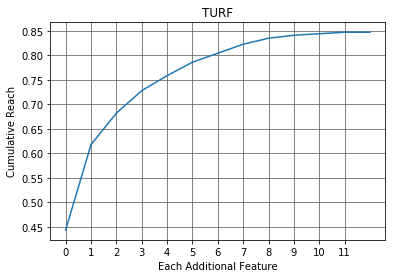

In [217]:
plt.plot(percentages)
plt.ylabel("Cumulative Reach")
plt.xlabel("Each Additional Feature")
plt.title("TURF")
plt.xticks(range(0,12))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()